# Author- Akshita Singla

# The Sparks Foundation, GRIP MAY'21

## Task 2- Prediction using Unsupervised Machine Learning

## To predict the optimum no. of clusters and represent it visually

## Importing libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [9]:
data= pd.read_csv('iris.csv')

In [10]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
# checking for the types of species that we have in the data
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Checking for the Missing Values

In [13]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Using the elbow method to find the optimal number of clusters

In [18]:
X= data.iloc[:,[0,1,2,3]].values

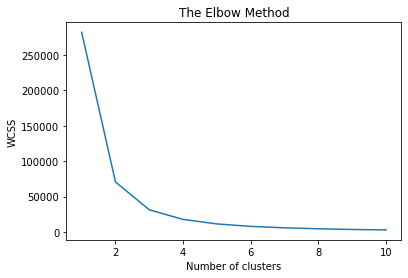

In [19]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the data

In [25]:
kmeans= KMeans(n_clusters=3, init= 'k-means++', random_state=42)
y_kmeans= kmeans.fit_predict(X)

In [26]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualising the clusters

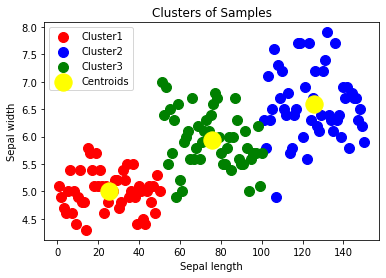

In [32]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='red', label= 'Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='blue', label= 'Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='green', label= 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Samples')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()